In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=keras.Sequential([keras.layers.Dense(units=10,activation='relu',input_shape=(1,)),keras.layers.Dense(units=1)])
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_train=np.array([[1],[2],[3],[4],[5]])
y_train=np.array([[2],[4],[6],[8],[10]])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 28.4682
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 28.2409
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 28.0143
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 27.7887
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 27.5639
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 27.3400
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 27.1170
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 26.8950
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 26.6739
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 26.4537
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 26.2345
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 26.0163
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 25.7990
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 25.5828
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 25.3676
Epoch

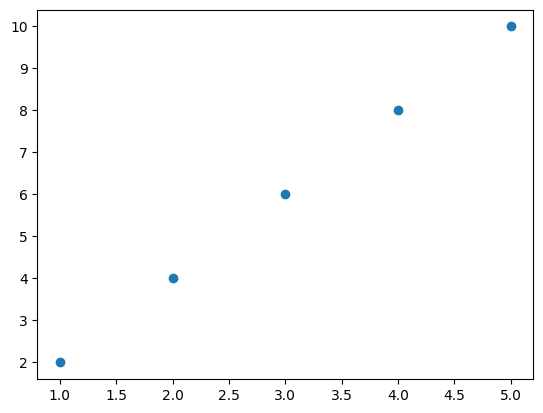

In [ ]:
plt.scatter(X_train,y_train)
plt.show()

In [ ]:
X_new=np.array([[6],[7],[8]])
pred=model.predict(X_new)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[5.7845645]
 [6.689083 ]
 [7.5936017]]


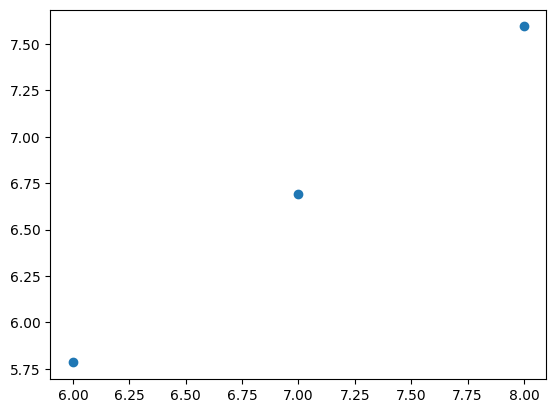

In [ ]:
plt.scatter(X_new,pred)
plt.show()

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/pima-indians-diabetes.csv')
print(df)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)

In [ ]:
X_train,XX,y_train,yy=train_test_split(X_scale,y,test_size=0.3)
X_val,X_test,y_val,y_test=train_test_split(XX,yy,test_size=0.5)

In [ ]:
model=Sequential([Dense(32,activation='relu',input_shape=(8,)),Dense(32,activation='relu'),Dense(1,activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5280 - loss: 0.6933 - val_accuracy: 0.7043 - val_loss: 0.6827
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6263 - loss: 0.6874 - val_accuracy: 0.6696 - val_loss: 0.6742
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6444 - loss: 0.6790 - val_accuracy: 0.6696 - val_loss: 0.6679
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6276 - loss: 0.6766 - val_accuracy: 0.6696 - val_loss: 0.6629
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6083 - loss: 0.6775 - val_accuracy: 0.6696 - val_loss: 0.6589
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6608 - loss: 0.6615 - val_accuracy: 0.6696 - val_loss: 0.6558
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6136 - loss: 0.6732 - val_accuracy: 0.6696 - val_loss: 0.6532
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6306 - loss: 0.6673 - val_accuracy: 0.6696 - 

In [ ]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7092 - loss: 0.5727


[0.5775535106658936, 0.6896551847457886]

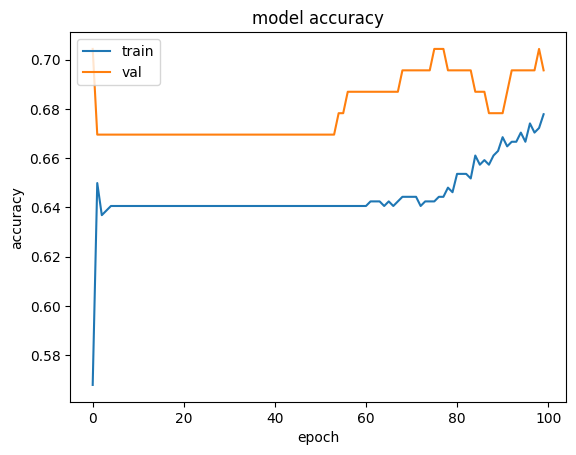

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

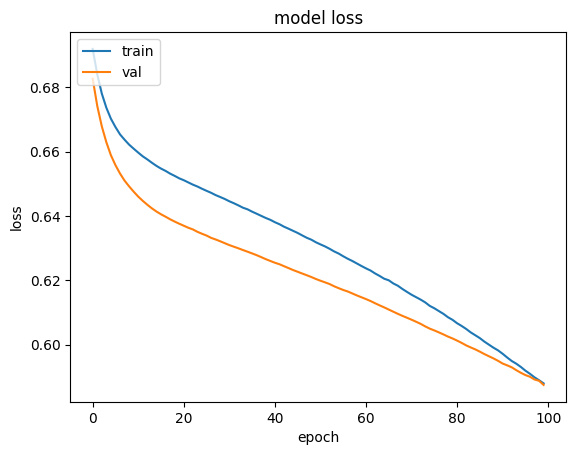

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()